In [ ]:
#Problem 1.7 (a)

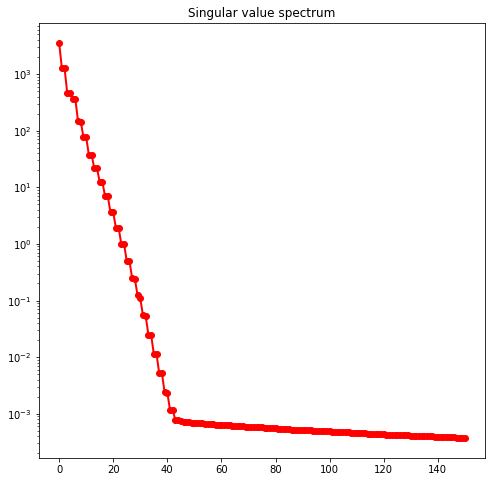

89351


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.io
import collections as cl
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 10})

cylinder_mat=scipy.io.loadmat('CYLINDER_ALL.mat')

UALL=cylinder_mat['UALL']
VALL=cylinder_mat['VALL']
VORTALL=cylinder_mat['VORTALL']
U, S, VT=np.linalg.svd(VORTALL,full_matrices=False)

#plot singular value spectrum
fig1, ax1=plt.subplots(1)
ax1.semilogy(S,'-o', color='r', linewidth=2)
plt.title('Singular value spectrum')
plt.show()
Y=print(U.shape[0])

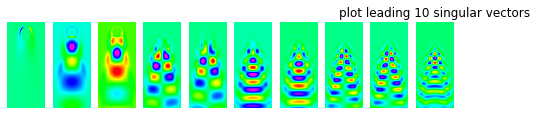

In [9]:
#plot leading 10 singular vectors
fig2, ax2=plt.subplots(1,10)
for k in range(10):
    V=np.reshape(U[:,k],(449,199))
    ax2[k].imshow(V)
    ax2[k].axis('off')
plt.set_cmap("gist_rainbow")
plt.title('plot leading 10 singular vectors')
plt.show()

In [ ]:
#Problem1.7 (b)

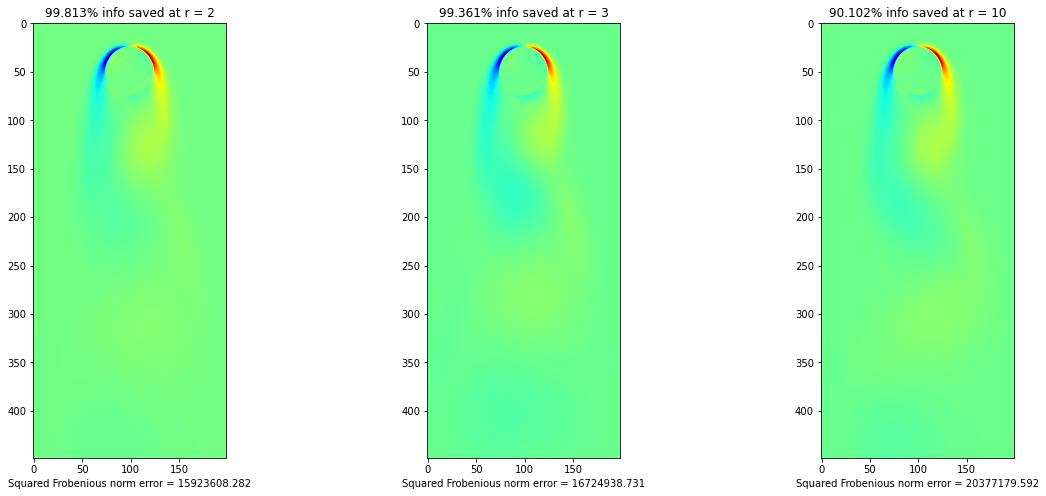

In [23]:
from sklearn.decomposition import PCA
f, axes = plt.subplots(1,3, figsize=(20,8))

pca = PCA(n_components=1)
X = pca.fit_transform(VORTALL)

for i,r in enumerate([2, 3, 10]): #Truncation value
    X_approx = U[:,:r] @ np.diag(S)[:r,:r] @ VT[:r,:r]
    X_approx = pca.fit_transform(X_approx)
    squared_frob_err = np.linalg.norm(X - X_approx)**2

    axes[i].imshow(X_approx.reshape(449,199), cmap='jet')
    axes[i].set_title('{}% info saved at r = {}'.format(round(pca.explained_variance_ratio_[0]*100, 3), r) )
    axes[i].set_xlabel('Squared Frobenious norm error = {}'.format(round(squared_frob_err, 3)))

In [ ]:
#problem 1.7 (c)

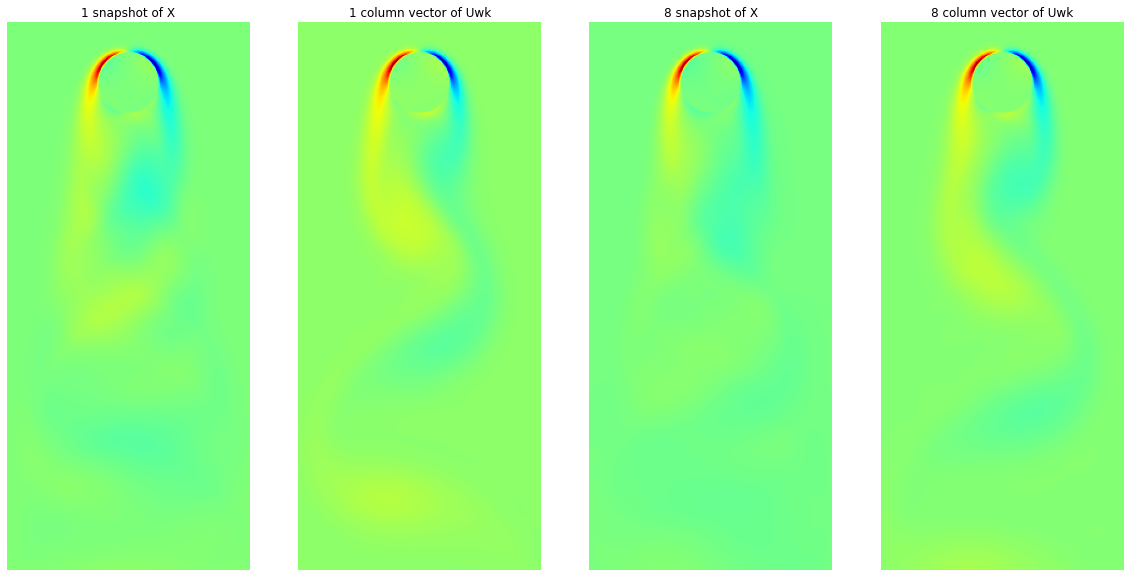

In [13]:
r = 10
W = np.diag(S)[:r,:r] @ VT[:r,:r]
V_S2_VT = VORTALL.T @ VORTALL
S2_MoS, V_MoS = np.linalg.eig(V_S2_VT)
S_MoS = np.sqrt(S2_MoS)
U_MoS = VORTALL @ V_MoS @ np.linalg.inv(np.diag(S_MoS))

f, ax = plt.subplots(1, 4, figsize=(20,40))

for i in range(2):
    
    ax[i*2].imshow((U_MoS @ np.diag(S_MoS) @ V_MoS)[:,i*7].reshape(449,199), cmap='jet')
    ax[i*2].set_title('{} snapshot of X'.format(i*7+1))
    ax[i*2].axis('off')
    ax[i*2+1].imshow((U[:,:r]@W[:,i*7]).reshape(449,199), cmap='jet')
    ax[i*2+1].set_title('{} column vector of Uwk'.format(i*7+1))
    ax[i*2+1].axis('off');

In [ ]:
#problem 1.7 (d)

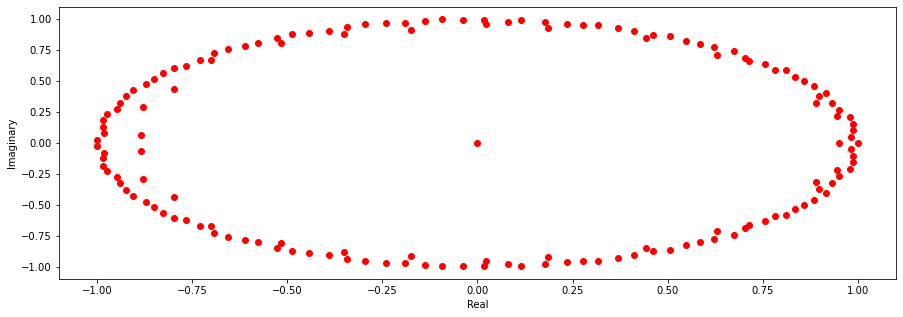

In [22]:
w= (np.diag(S) @ VT)[:,:-1]
w_prime= (np.diag(S) @ VT)[:,1:]
U_w, S_w, VT_w = np.linalg.svd(w, full_matrices=False)
w_inv = VT_w.T @ np.linalg.inv(np.diag(S_w)) @ U_w.T
A = w_prime @ w_inv

eigvalue_A= np.linalg.eigvals(A)

eigvalue_A_real =eigvalue_A.real
eigvalue_A_img = eigvalue_A.imag
  
plt.figure(figsize=(15,5))
plt.scatter(eigvalue_A_real, eigvalue_A_img, color='red')
plt.ylabel('Imaginary')
plt.xlabel('Real');